In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [3]:
Head_Brain = pd.read_csv('C:/Users/GL-FF-CR1/Desktop/Head and Brain.csv') #https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv

In [4]:
Head_Brain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
Head_Brain.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


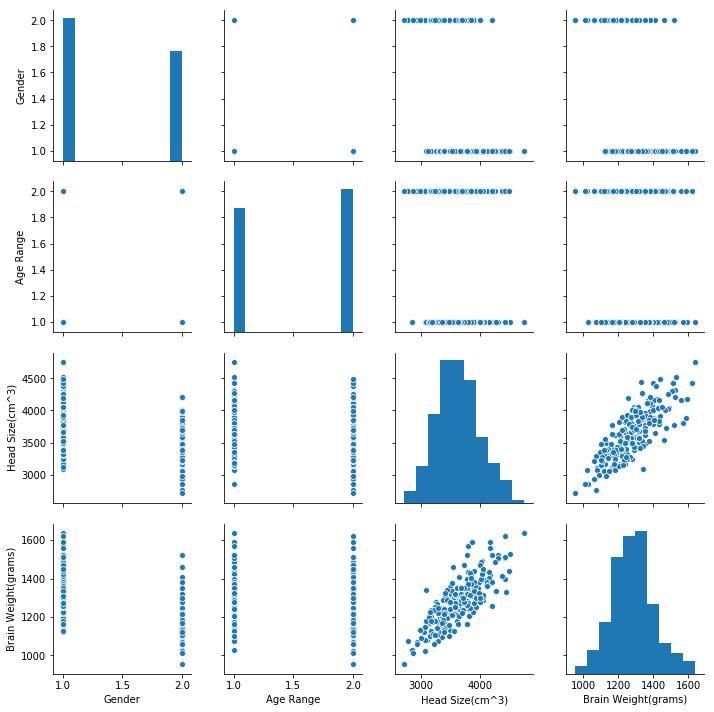

In [6]:
sns.pairplot(Head_Brain)

In [7]:
import scipy
from scipy import stats

X = Head_Brain.loc[:,['Gender','Age Range','Head Size(cm^3)']]
y = Head_Brain.loc[:,'Brain Weight(grams)']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression

Regression_Model = LinearRegression()

Regression_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Predicting the Test set results
y_predict = Regression_Model.predict(X_test)

In [11]:
y_predict

array([1311.26770555, 1300.59652006, 1373.40002339, 1250.19633646,
       1312.76828769, 1264.91901045, 1483.99230929, 1264.94505948,
       1401.55919778, 1314.39450677, 1393.2872327 , 1124.25338363,
       1185.12764627, 1325.37968872, 1202.83211309, 1242.14752685,
       1288.95522681, 1345.26689803, 1251.84860457, 1299.45535487,
       1261.86367874, 1404.44347206, 1343.08415554, 1292.66460047,
       1345.77800094, 1332.19649215, 1177.15030619, 1306.00358233,
       1469.92574661, 1100.99684616, 1173.00129913, 1265.96058774,
       1224.17448406, 1379.41777647, 1360.08709057, 1235.84182634,
       1330.42733402, 1349.31838653, 1322.95441929, 1241.9504204 ,
       1331.20033534, 1173.82639851, 1157.50562382, 1363.23994082,
       1426.99847774, 1286.35889996, 1232.93150303, 1170.84460568])

In [12]:
#Regression Diagnostics
from sklearn.metrics import mean_squared_error, r2_score
Regression_Model.coef_,Regression_Model.intercept_

(array([-15.10813997, -27.67412051,   0.24252694]), 465.9877710962021)

In [13]:
# Rsquare values
Regression_Model.score(X_train,y_train),Regression_Model.score(X_test,y_test),Regression_Model.score(X_test,y_predict)

(0.6522441723929309, 0.6463914618720024, 1.0)

In [14]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))

Mean squared error: 5074.96


In [15]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predict))

Variance score: 0.65


Text(0.5, 1.0, 'Comparision between Actual & Predicted Brain sizes')

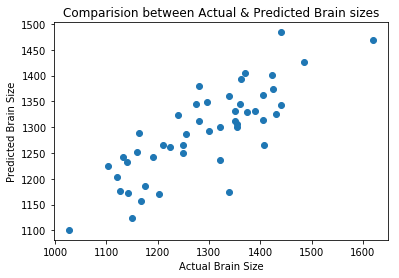

In [16]:
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Brain Size")
plt.ylabel("Predicted Brain Size")
plt.title("Comparision between Actual & Predicted Brain sizes")